In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import ttest_ind

In [21]:
data_smlp = pd.read_csv('distribution_emb.csv')
data_rmlp = pd.read_csv('../../mlp/logs/multiregression/multi_regression.csv')

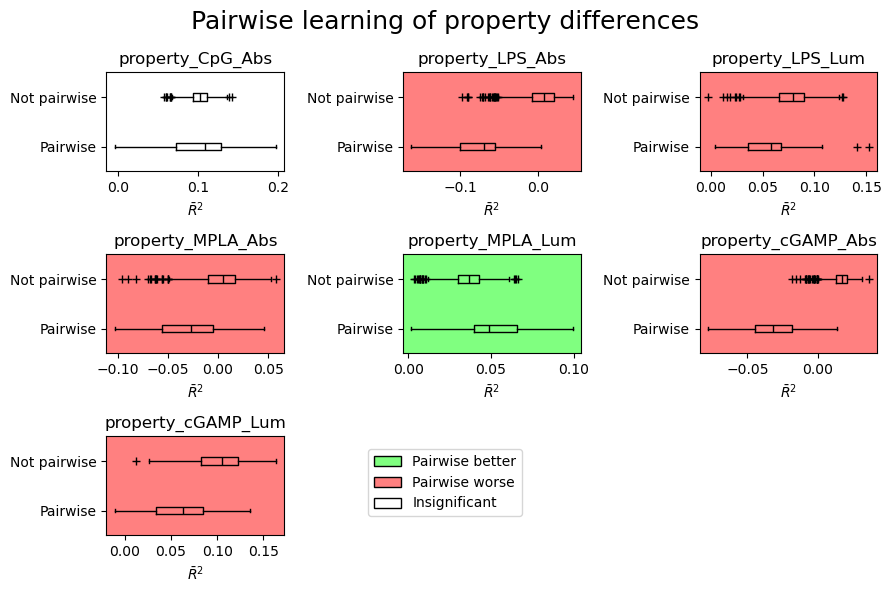

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(9, 6))
axs = axs.flatten()

for i, property_label in enumerate(data_smlp.columns):

    ax = axs[i]

    smlp, rmlp = data_smlp.iloc[:, i], data_rmlp.iloc[:, i]
    tstat, pval = ttest_ind(smlp, rmlp, equal_var=False)

    ax.boxplot(
        x=[smlp, rmlp], tick_labels=['Pairwise', 'Not pairwise'], 
        vert=False, sym='+', 
        medianprops={'color': 'black'}
    )

    color=(1, 1, 1)
    if pval < 0.05:
        if tstat > 0: color = (0.5, 1, 0.5)
        else: color = (1, 0.5, 0.5)
    ax.set_facecolor(color)
    ax.set_xlabel(r'$\bar{R}^2$')
    ax.set_title(property_label)
    #ax.legend()

axs[-1].axis('off')
axs[-2].axis('off')

legend_elements = [
    Patch(facecolor=(0.5, 1, 0.5), edgecolor='black', label='Pairwise better'), 
    Patch(facecolor=(1, 0.5, 0.5), edgecolor='black', label='Pairwise worse'), 
    Patch(facecolor=(1, 1, 1), edgecolor='black', label='Insignificant')
]
fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, 0.125), loc='lower center')
fig.suptitle('Pairwise learning of property differences', fontsize=18)

plt.tight_layout()